# Algorithm Analysis

Problem:  want to compute the sum of numbers from 1 to N

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set()


In [2]:
def sumOfN(N):
    total = 0
    for i in range(N+1):
        total = total + i
    return total

sumOfN(5)


15

In [29]:
def sumOfN2(N):
    return N * (N+1) / 2


In [6]:
import time

def timefunc(trials, func, param):
    start_time = time.time()
    for i in range(trials):
        func(param)
    end_time = time.time()
    return (end_time-start_time) / trials


    

In [20]:
result_list = [timefunc(10000, sumOfN, N) for N in range(100, 10000, 100)]


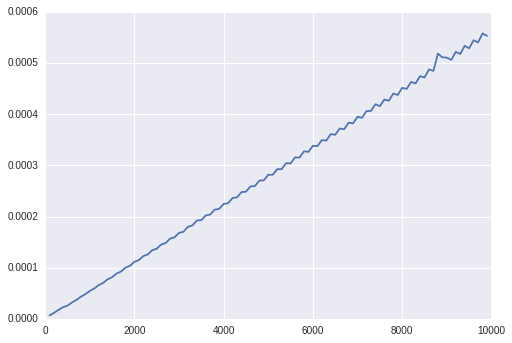

In [28]:
plt.plot(list(range(100, 10000, 100)), result_list)


In [33]:
result_list2 = [timefunc(1000000, sumOfN2, N) for N in range(100, 10000, 100)]

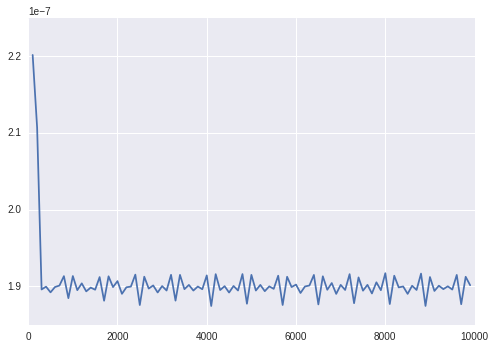

In [34]:
plt.plot(list(range(100,10000, 100)), result_list2)

# Anagram Detectors

In [101]:
def anagramSolution1(s1,s2):
    
    alist = list(s2)

    pos1 = 0
    stillOK = True

    while pos1 < len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1

        if found:
            alist[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK



### Gathering some data to time our anagram detector

Lets write a function called shufflestring to randomly reorder a string.  It will be an anagram, but not necessarily a real word.  The idea is just to mix up the letters to give our anagram detector something interesting to work on.

In [62]:
import random

def shufflestring(str1):
    tl = list(str1)
    random.shuffle(tl)
    return "".join(tl)
    

def timefunc2(trials, func, param1, param2):
    start_time = time.time()
    for i in range(trials):
        func(param1, param2)
    end_time = time.time()
    return (end_time-start_time) / trials


In [65]:
timefunc2(100, anagramSolution1, "abcde", shufflestring("abcde"))

1.3468265533447266e-05

To make a long string we can make use of the repetition operator for strings.  This will allow us to just clone the alphabet a bunch of times to make a relly long string.

In [66]:
"abcd"*5

'abcdabcdabcdabcdabcd'

In [102]:
alpha = "abcdefghijklmnopqrstuvwxy"

tt_n2 = [timefunc2(10, anagramSolution1, alpha*(i//10), shufflestring(alpha*(i//10))) for i in range(100,5001,100)]

Now with our results in the ``tt_n2`` list we can use the plotting library of matplot lib to draw a simple graph.

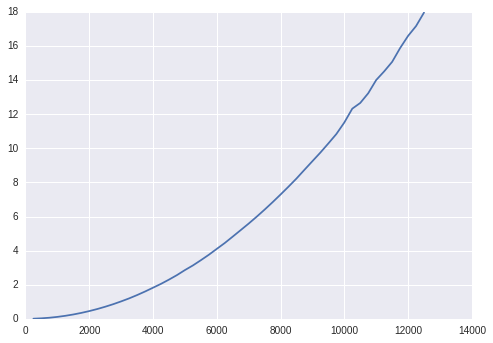

In [103]:
plt.plot([x//10*25 for x in range(100,5001,100)], tt_n2)


In [73]:
def anagramSolution1(s1, s2):
    alist = list(s2)

    for ch in s1:
        found = False
        for ix, lch in enumerate(alist):
            if ch == lch:
                alist[ix] = ''
                found = True
                break
        if not found:
            return False

    return True
            
            




In [100]:
import unittest

class AnagramTest(unittest.TestCase):

    def test_detector(self):
        self.assertTrue(anagramSolution1("racecar", "racecar"))
        self.assertTrue(anagramSolution1("racecar", "eccaarr"))
        self.assertTrue(anagramSolution1("percussion", "supersonic"))
        self.assertFalse(anagramSolution1("racecar", "xxxxxxx"))
        self.assertFalse(anagramSolution1("racecar", ""))
        self.assertTrue(anagramSolution1("", ""))


myTests = AnagramTest()
suite = unittest.TestLoader().loadTestsFromModule(myTests)
unittest.TextTestRunner().run(suite)
        


.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### An N Log(N)  Solution

Sort and compare


In [82]:
def anagramSolution2(s1, s2):

    s1 = sorted(s1)
    s2 = sorted(s2)

    return s1 == s2


anagramSolution2("percussion", "supersonic")



True

In [83]:
tt2 = [timefunc2(100, anagramSolution2, alpha*(i//10), shufflestring(alpha*(i//10))) for i in range(100,5001,100)]

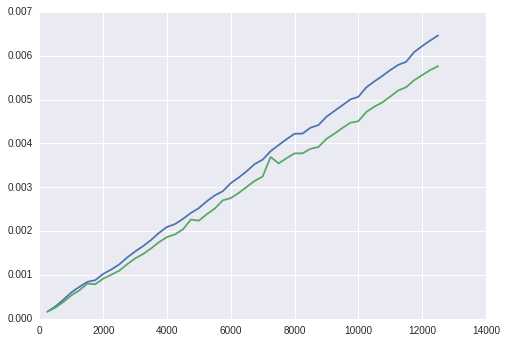

In [84]:
plt.plot([x//10*25 for x in range(100,5001,100)], tt)
plt.plot([x//10*25 for x in range(100,5001,100)], tt2)


Now lets look at the two results above to compare them to the $N^2$ solution from above:


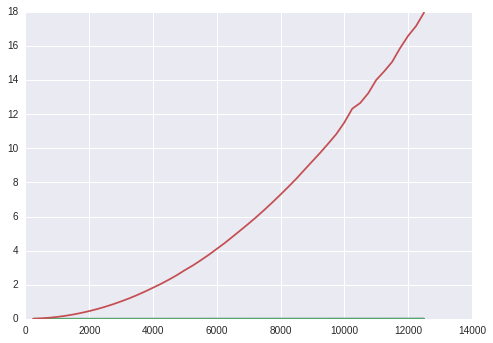

In [104]:
plt.plot([x//10*25 for x in range(100,5001,100)], tt)
plt.plot([x//10*25 for x in range(100,5001,100)], tt2)
plt.plot([x//10*25 for x in range(100,5001,100)], tt_n2)


Wow!  This is a pretty striking example that illustrates just how bad $N^2$ really is!  The $N \log(N)$ solution is barely even visible along the bottom of this.  Of course we could have predicted that by looking at the scale on the y axis for the two graphs.

### A O(N) solution

In [89]:
def anagramSolution3(s1, s2):
    d1 = {}
    d2 = {}

    for ch1, ch2 in zip(s1, s2):
        d1[ch1] = d1.get(ch1,0) + 1
        d2[ch2] = d2.get(ch2,0) + 1

    return d1 == d2



anagramSolution3("percussion", "supersonic")
    

True

In [90]:
tt3 = [timefunc2(100, anagramSolution3, alpha*(i//10), shufflestring(alpha*(i//10))) for i in range(100,5001,100)]

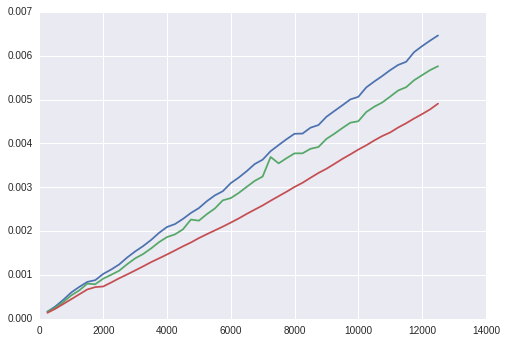

In [91]:
plt.plot([x//10*25 for x in range(100,5001,100)], tt)
plt.plot([x//10*25 for x in range(100,5001,100)], tt2)
plt.plot([x//10*25 for x in range(100,5001,100)], tt3)

In [96]:
from collections import Counter

def anagramSolution3(s1, s2):
    c1 = Counter(s1)
    c2 = Counter(s2)

    return c1 == c2

    

In [97]:
tt4 = [timefunc2(100, anagramSolution3, alpha*(i//10), shufflestring(alpha*(i//10))) for i in range(100,5001,100)]

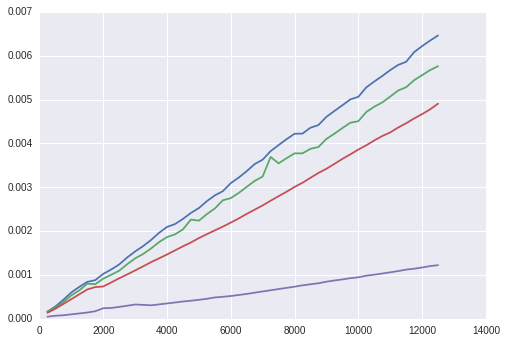

In [98]:
plt.plot([x//10*25 for x in range(100,5001,100)], tt)
plt.plot([x//10*25 for x in range(100,5001,100)], tt2)
plt.plot([x//10*25 for x in range(100,5001,100)], tt3)
plt.plot([x//10*25 for x in range(100,5001,100)], tt4)